In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import warnings

In [46]:
warnings.filterwarnings("ignore")

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
file_path = '/content/drive/MyDrive/DataSet/Admission_Predict.csv'

In [49]:
df = pd.read_csv(file_path)

In [50]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Serial No.	Sıra Numarası (Öğrenciye ait ID, analizde kullanılmaz)

GRE Score -	GRE Puanı (Graduate Record Examination - Yüksek lisans başvuru sınavı)

TOEFL Score - TOEFL Puanı (İngilizce yeterlilik sınavı puanı)

University Rating -	Üniversitenin Derecesi (1–5 arası, üniversitenin kalitesine göre verilmiş skor)

SOP	- Niyet Mektubu Gücü (Statement of Purpose, 1–5 arası derecelendirilmiş)

LOR -	Referans Mektubu Gücü (Letter of Recommendation, 1–5 arası derecelendirilmiş)

CGPA -	Mezuniyet Not Ortalaması (4 üzerinden değil, 10 üzerinden)

Research -	Araştırma Deneyimi (1 = varsa, 0 = yoksa)

Chance of Admit -	Kabul Edilme Olasılığı (0.00 ile 1.00 arasında tahmini kabul ihtimali)



In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,400.0,200.500000,115.614301,1.00,100.75,200.50,300.2500,400.00
GRE Score,400.0,316.807500,11.473646,290.00,308.00,317.00,325.0000,340.00
TOEFL Score,400.0,107.410000,6.069514,92.00,103.00,107.00,112.0000,120.00
University Rating,400.0,3.087500,1.143728,1.00,2.00,3.00,4.0000,5.00
SOP,400.0,3.400000,1.006869,1.00,2.50,3.50,4.0000,5.00
LOR,400.0,3.452500,0.898478,1.00,3.00,3.50,4.0000,5.00
CGPA,400.0,8.598925,0.596317,6.80,8.17,8.61,9.0625,9.92
Research,400.0,0.547500,0.498362,0.00,0.00,1.00,1.0000,1.00
Chance of Admit,400.0,0.724350,0.142609,0.34,0.64,0.73,0.8300,0.97


In [53]:
df.isna().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [54]:
df["Chance of Admit Binary"] = (df["Chance of Admit "] >= 0.75).astype(int)

In [55]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Chance of Admit Binary
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,1
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0
3,4,322,110,3,3.5,2.5,8.67,1,0.80,1
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0


In [56]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit ',
       'Chance of Admit Binary'],
      dtype='object')

In [57]:
df_copy = df.copy()

In [58]:
df_copy.rename(columns={
    'Chance of Admit ': 'Chance of Admit',
    'Serial No.': 'Serial No',
}, inplace=True)

In [59]:
X = df_copy.drop(['Serial No', 'Chance of Admit', 'Chance of Admit Binary'], axis=1) #bağımsız
y = df_copy['Chance of Admit Binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # test setinde fit_transform yapılmama sebebi veri sızıntısını önlemek, train setinin bilgilerini kullanarak test seti ölçeklenir.

In [94]:
model = LogisticRegression(solver='saga', tol=1e-4, max_iter=1000, verbose=1) # Genelde 1e-3 ile 1e-5 arası iyi çalışır, max iter 1000 yazsa da eğitim tamamlandı ise durur
model.fit(X_train_scaled, y_train)
tahminler = model.predict(X_test_scaled)

convergence after 21 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [62]:
dogruluk = accuracy_score(tahminler, y_test)
print(f"Doğruluk oranı: {dogruluk: .2f}")

Doğruluk oranı:  0.91


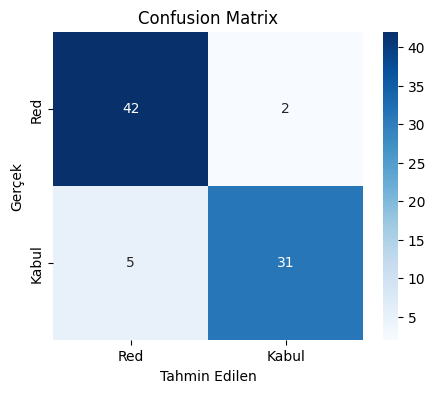

In [63]:
matris = confusion_matrix(tahminler, y_test)
etiketler = ["Red","Kabul"]
plt.figure(figsize=(5,4))
sns.heatmap(matris, annot = True,fmt='d', cmap='Blues', xticklabels=etiketler, yticklabels= etiketler )
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.title("Confusion Matrix")
plt.show()
# model 5 kişiye red demiş ancak bu kişiler kabul edilmiş ve 2 kişiye kabul demiş ama bu kişiler reddedilmiş

In [65]:
print(classification_report(tahminler, y_test))
#Model genel olarak dengeli ve iyi çalışıyor.
#Sınıf 0 için recall çok yüksek, yani bu sınıfı kaçırmıyor.
#Sınıf 1 için recall biraz daha düşük, bu sınıftaki bazı gerçek örnekleri kaçırıyor (örneğin pozitif örnekleri azıcık atlıyor).

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        44
           1       0.94      0.86      0.90        36

    accuracy                           0.91        80
   macro avg       0.92      0.91      0.91        80
weighted avg       0.91      0.91      0.91        80



In [78]:
karsilastirma_df = pd.DataFrame({
    'Gerçek Değer': y_test,
    'Tahmin': tahminler
})

print(karsilastirma_df.tail(20))  # İlk 10 öğrenci


     Gerçek Değer  Tahmin
124             0       0
294             0       0
255             1       0
78              0       0
101             0       0
31              0       0
352             0       0
268             1       1
394             1       1
73              1       1
320             1       0
140             1       1
5               1       1
45              1       1
388             0       0
246             0       0
227             0       0
369             0       0
176             1       1
289             1       1


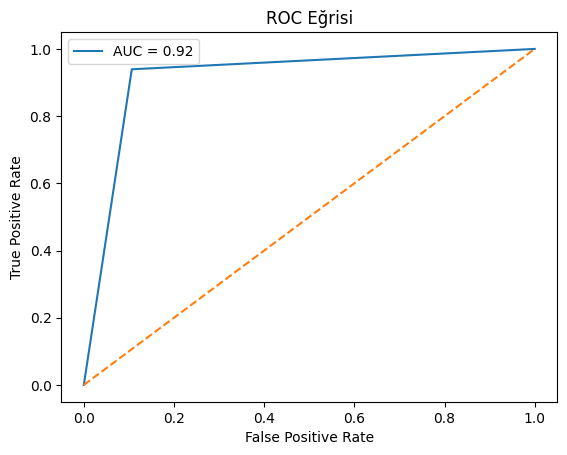

In [74]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, tahminler)
auc = roc_auc_score(y_test, tahminler)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Eğrisi")
plt.legend()
plt.show()


In [79]:
print("Ağırlıklar (W):", model.coef_)
print("Bias (b):", model.intercept_) # en son değerler

Ağırlıklar (W): [[0.71823304 0.34698431 0.30993856 0.42555718 0.25271671 1.76046183
  0.41154067]]
Bias (b): [-0.37879045]


In [82]:
from sklearn.linear_model import SGDClassifier

In [89]:
model = SGDClassifier(loss='log_loss', max_iter=1, tol=None, warm_start=True)

weights = []
biases = []

for i in range(2):  # 10 iterasyon
    model.fit(X_train, y_train)
    weights.append(model.coef_.copy())
    biases.append(model.intercept_.copy())

print(weights,biases)

[array([[ -11.37225171, 1694.46550417,  780.89461713,  617.89234268,
         473.84382108,  267.21000758,  261.56178923]]), array([[ 324.97279799, 3072.60882386, 1463.31593822, 1169.27554992,
         851.68307601,  513.67914903,  448.29433468]])] [array([-30.62990597]), array([-66.79098606])]


In [95]:
ozellikler = X_train.columns
agırlıklar = model.coef_[0]
onemli_df = pd.DataFrame({
    'Özellik': ozellikler,
    'Ağırlık (W)': agırlıklar
}).sort_values(by='Ağırlık (W)', ascending=False)

print(onemli_df)
#negatif veya pozitif fark etmez mutlak olarak baktığımızda büyük olan değerler en yüksek etkili değerlerdir. burada da cgpa özelliği en önemlisidir.

             Özellik  Ağırlık (W)
5               CGPA     1.762134
0          GRE Score     0.714525
3                SOP     0.423979
6           Research     0.411982
1        TOEFL Score     0.350433
2  University Rating     0.310385
4               LOR      0.253910


In [99]:
y_probs = model.predict_proba(X_test_scaled)[:, list(model.classes_).index(1)]

for threshold in [0.5, 0.6, 0.7, 0.8, 0.9]:
    y_pred = (y_probs >= threshold).astype(int)
    print(f"\nEşik: {threshold}")
    print(classification_report(y_test, y_pred))

# en iyi sonuçların 0.6da olduğu görüldü


Eşik: 0.5
              precision    recall  f1-score   support

           0       0.95      0.89      0.92        47
           1       0.86      0.94      0.90        33

    accuracy                           0.91        80
   macro avg       0.91      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80


Eşik: 0.6
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        47
           1       0.94      0.94      0.94        33

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80


Eşik: 0.7
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        47
           1       0.94      0.91      0.92        33

    accuracy                           0.94        80
   macro avg       0.94      0.93      0.94        80
weighted avg       0.94      0.94      0.

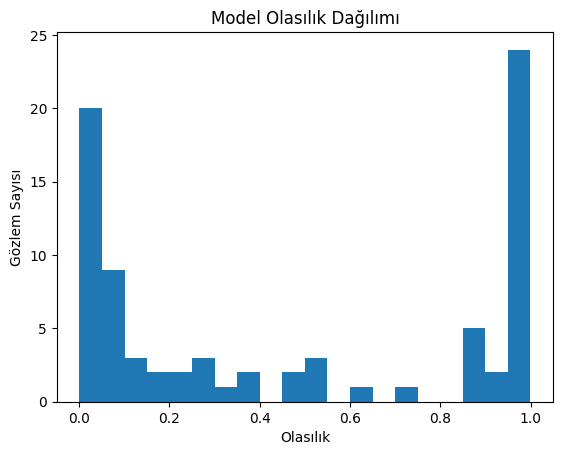

In [100]:
plt.hist(y_probs, bins=20)
plt.title("Model Olasılık Dağılımı")
plt.xlabel("Olasılık")
plt.ylabel("Gözlem Sayısı")
plt.show()


Var olan özelliklerden yeni özellikler çıkarılabilir. TOEFL yüksekse GPA düşükse gibi durumları yakalayan değişkenler tutulabilir.
Random Forest, KNN gibi farklı algoritmalar kullanılabilir.
Eşik değeri optimize edilmeli. Varsayılan her zaman iyi sonuç vermiyor.
Veri boyutu arttırılabilir, cross-validation kullanılabilir.